#FLOW OF MODEL

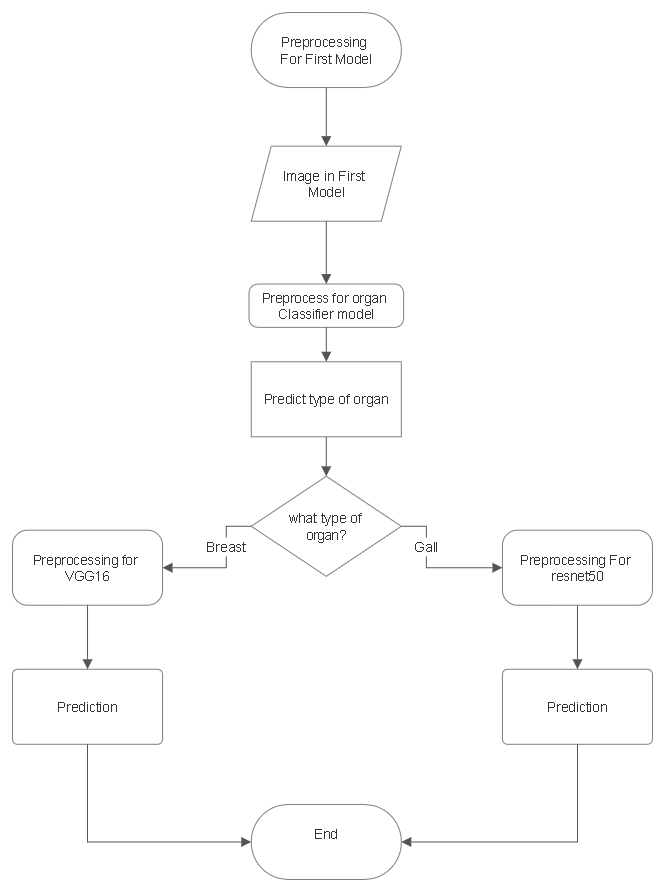

#Importing Libraries

In [1]:
import os
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input
from keras.applications import ResNet50
from keras.models import Model
import numpy as np
from tensorflow.keras.models import load_model
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array

import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Importing Image

In [3]:
import cv2


folder_path = '/content/drive/MyDrive/Input Images'

# Get a list of all files in the directory
all_files = os.listdir(folder_path)

# Filter out only image files
image_files = [file for file in all_files if file.endswith('.jpg') or file.endswith('.png')]

# Get the first image file
image_file = image_files[0]

# Construct the full file path
image_path = os.path.join(folder_path, image_file)

# Read the image file
image = cv2.imread(image_path)
print(type(image))
# Now you can use 'image' for prediction
image_copy = image.copy()
image_copy1=image.copy()


<class 'numpy.ndarray'>


In [4]:

image_copy = tf.cast(image_copy, tf.float32)
image_copy = tf.image.resize(image_copy, [224,224])# Convert the image to a NumPy array and normalize the pixel values
image_copy = np.array(image_copy) / 255.0


image_copy1 = tf.cast(image_copy1, tf.float32)
image_copy1 = tf.image.resize(image_copy1, [244,244])# Convert the image to a NumPy array and normalize the pixel values
image_copy1 = np.array(image_copy1) / 255.0

  # Add an extra dimension for the batch size
image_copy = np.expand_dims(image_copy, axis=0)
image_copy1 = np.expand_dims(image_copy1, axis=0)

print(image_copy.shape)

(1, 224, 224, 3)


#Classifying Ultrasound

In [5]:
model_path='/content/drive/MyDrive/UC.h5'
model=load_model(model_path)
prediction = model.predict(image_copy)
#predicted_classes = [1 if prob > 0.5 else 0 for prob in predictions]
predicted_classes = np.argmax(prediction)
#if the result is 0 then it is Not an ultrasound image
#else if result is 1 then the image is ultrasound image
print(predicted_classes)

1/1 [==============================] - 2s 2s/step
0


In [ ]:
#INPUT CLASS predictor
if(predicted_classes==1):
    model_path='/content/drive/MyDrive/organClassifier.h5'
    model=load_model(model_path)
    predictions = model.predict(image_copy)
    #predicted_classes = [1 if prob > 0.5 else 0 for prob in predictions]
    predicted_class = np.argmax(predictions)
    print(predicted_class)


#Predicting

1/1 [==============================] - 0s 117ms/step


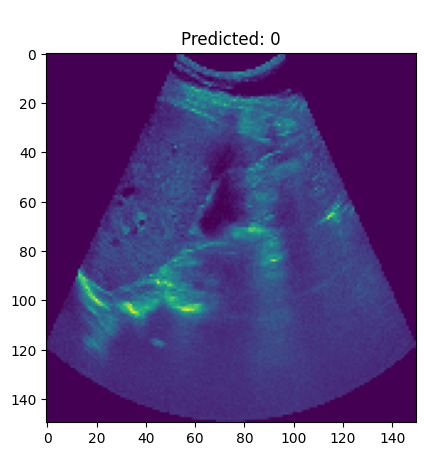

In [ ]:
if predicted_class == 0:
 model_path='/content/drive/MyDrive/best_model_2.h5'
 incept_model=load_model(model_path)
 IMAGE_SHAPE=(224,224)
 def prepare_image(file):
    img = load_img(file, target_size=IMAGE_SHAPE)
    img_array = img_to_array(img)
    return tf.keras.applications.efficientnet.preprocess_input(img_array)
 classes=['benign','malignant','normal']
 img1 = prepare_image(str(image_path)) # preprocess the image
 res = incept_model.predict(np.expand_dims(img1, axis = 0)) # predict the image
 pred = classes[np.argmax(res)]

 # Visualize the image
 plt.imshow(img1 / 255.0) # assuming img1 was normalized to [-1, 1]
 plt.title(f'\nPredicted: {pred}')
else:
 def prepare_image(file):
    img = load_img(file, target_size=(150, 150), color_mode='grayscale')
    img_array = img_to_array(img)
    img_array = img_array.reshape((150, 150, 1)) # Reshape to (150, 150, 1)
    return img_array
 classes=['0','1','2']
 model_path='/content/drive/MyDrive/my_gall2.h5'
 model=load_model(model_path)
 img2 = prepare_image(str(image_path)) # assuming prepare_image does the same operations as in the else clause
 res = model.predict(np.expand_dims(img2, axis = 0)) # predict the image
 pred = classes[np.argmax(res)]

 # Visualize the image
 plt.imshow(img2 / 255.0) # assuming img2 was normalized to [-1, 1]
 plt.title(f'\nPredicted: {pred}')
